In [1]:
import pandas as pd
import numpy as np
import datetime
from wordcloud import WordCloud

data = pd.read_csv('./data.csv',encoding="ISO-8859-1")

data = data[~data['CustomerID'].isna()].reset_index(drop=True)
print (len(data))
print (data.keys())
import matplotlib.pyplot as plt
data['TotalRevenue'] = data['Quantity']*data['UnitPrice']/1#interpretation
data.iloc[5000:5005]

406829
Index([u'InvoiceNo', u'StockCode', u'Description', u'Quantity', u'InvoiceDate',
       u'UnitPrice', u'CustomerID', u'Country'],
      dtype='object')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue
5000,537026,22551,PLASTERS IN TIN SPACEBOY,12,12/3/2010 16:35,1.65,12395.0,Belgium,19.8
5001,537026,85099B,JUMBO BAG RED RETROSPOT,10,12/3/2010 16:35,1.95,12395.0,Belgium,19.5
5002,537026,22355,CHARLOTTE BAG SUKI DESIGN,10,12/3/2010 16:35,0.85,12395.0,Belgium,8.5
5003,537026,84992,72 SWEETHEART FAIRY CAKE CASES,24,12/3/2010 16:35,0.55,12395.0,Belgium,13.2
5004,537026,POST,POSTAGE,2,12/3/2010 16:35,18.00,12395.0,Belgium,36.0


# Get datetime

In [2]:
data['Month'] = data['InvoiceDate'].apply(lambda x : x.split('/')[0]).astype(np.uint8)
data['Day'] = data['InvoiceDate'].apply(lambda x : x.split('/')[1]).astype(np.uint8)
data['Year'] = data['InvoiceDate'].apply(lambda x : x.split('/')[2].split(' ')[0]).astype(np.uint16)
data['Time'] = data['InvoiceDate'].apply(lambda x : x.split('/')[2].split(' ')[1])
data['Hour']= data['Time'].apply(lambda x : x.split(':')[0]).astype(np.uint8)
data['Min']= data['Time'].apply(lambda x : x.split(':')[1]).astype(np.uint8)
data['datetime'] = list(map(lambda x : datetime.date(x[0],x[1],x[2]),data[['Year','Month','Day']].values) )
data['Day_week'] = list(map(lambda x :x.weekday(),data['datetime'].values)) # datetime.date(2017,12,25)
data['Day_week'] = data['Day_week'].map({0:'1mon',1:'2tue',2:'3wed',3:'4thur',4:'5fri',5:'6sat',6:'0sun'})
data = data.sort_values('datetime')
print (data.head())

     InvoiceNo StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1319    536535     22943  CHRISTMAS LIGHTS 10 VINTAGE BAUBLES         3   
1318    536534     22112           CHOCOLATE HOT WATER BOTTLE         3   
1317    536534     22867              HAND WARMER BIRD DESIGN        12   
1316    536534     22865               HAND WARMER OWL DESIGN        12   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalRevenue  \
0      12/1/2010 8:26       2.55     17850.0  United Kingdom         15.30   
1319  12/1/2010 13:38       4.95     15605.0  United Kingdom         14.85   
1318  12/1/2010 13:33       4.95     15350.0  United Kingdom         14.85   
1317  12/1/2010 13:33       2.10     15350.0  United Kingdom         25.20   
1316  12/1/2010 13:33       2.10     15350.0  United Kingdom         25.20   

      Month  Day  Year   Time  Hour  Min    datetime Day_week  
0        12    1

/home/leexiongan/anaconda3/envs/python27/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


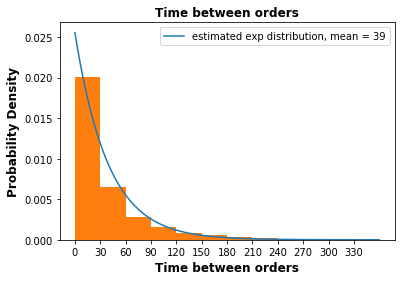

In [3]:
temp = data.groupby('CustomerID')['datetime'].apply(np.unique)
dist = list(map(lambda x : x.days,np.concatenate(list(map(lambda x : x[1:]-x[:-1],temp)))))
Lambda =  1./np.mean(dist)
x= np.linspace(0,360,1000)
plt.plot(x,Lambda*np.exp(-Lambda*x),label='estimated exp distribution, mean = %s'%int(1/Lambda))
plt.hist(dist,bins=range(0,361,30),normed=1)
plt.xticks(range(0,360,30))
plt.title('Time between orders',fontsize=12,fontweight='bold')
plt.xlabel('Time between orders',fontsize=12,fontweight='bold')
plt.ylabel('Probability Density',fontsize=12,fontweight='bold')
plt.legend()
plt.show()

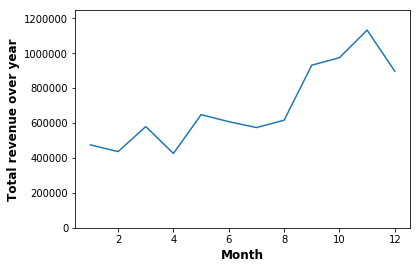

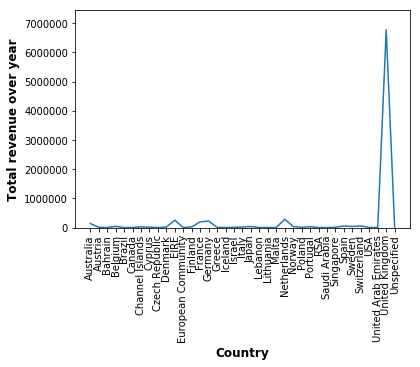

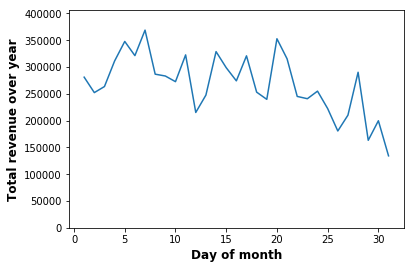

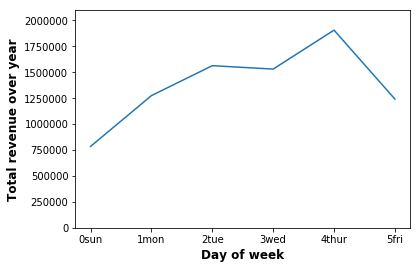

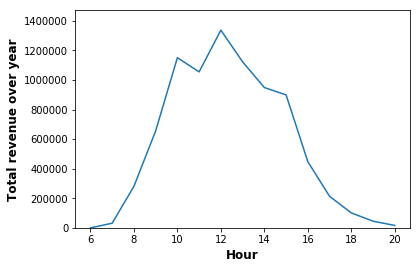

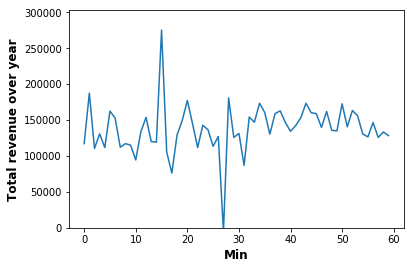

In [4]:

#exploratory statistics
temp  = data.groupby(['Month'])['TotalRevenue'].apply(np.sum)
plt.plot(temp);
plt.ylim(0,1.1*max(temp.values))
plt.ylabel('Total revenue over year',fontsize=12,fontweight='bold');
plt.xlabel('Month',fontsize=12,fontweight='bold');
plt.show()
#exploratory statistics
temp  = data.groupby(['Country'])['TotalRevenue'].apply(np.sum)
plt.plot(temp);
plt.ylim(0,1.1*max(temp.values))
plt.ylabel('Total revenue over year',fontsize=12,fontweight='bold');
plt.xlabel('Country',fontsize=12,fontweight='bold');
plt.xticks(temp.index,temp.index,rotation=90)
plt.show()
#exploratory statistics
temp  = data.groupby(['Day'])['TotalRevenue'].apply(np.sum)
plt.plot(temp);
plt.ylim(0,1.1*max(temp.values))
plt.ylabel('Total revenue over year',fontsize=12,fontweight='bold');
plt.xlabel('Day of month',fontsize=12,fontweight='bold');
plt.show()
#exploratory statistics
temp  = data.groupby(['Day_week'])['TotalRevenue'].apply(np.sum)
plt.plot(temp);
plt.ylim(0,1.1*max(temp.values))
plt.ylabel('Total revenue over year',fontsize=12,fontweight='bold');
plt.xlabel('Day of week',fontsize=12,fontweight='bold');
plt.show()
#exploratory statistics
temp  = data.groupby(['Hour'])['TotalRevenue'].apply(np.sum)
plt.plot(temp);
plt.ylim(0,1.1*max(temp.values))
plt.ylabel('Total revenue over year',fontsize=12,fontweight='bold');
plt.xlabel('Hour',fontsize=12,fontweight='bold');
plt.show()
#exploratory statistics
temp  = data.groupby(['Min'])['TotalRevenue'].apply(np.sum)
plt.plot(temp);
plt.ylim(0,1.1*max(temp.values))
plt.ylabel('Total revenue over year',fontsize=12,fontweight='bold');
plt.xlabel('Min',fontsize=12,fontweight='bold');
plt.show()

# Customer revenue have different scales, hence use log scale

(array([4.307e+03, 1.200e+01, 3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]), array([     0,  50000, 100000, 150000, 200000, 250000, 300000]), <a list of 6 Patch objects>)


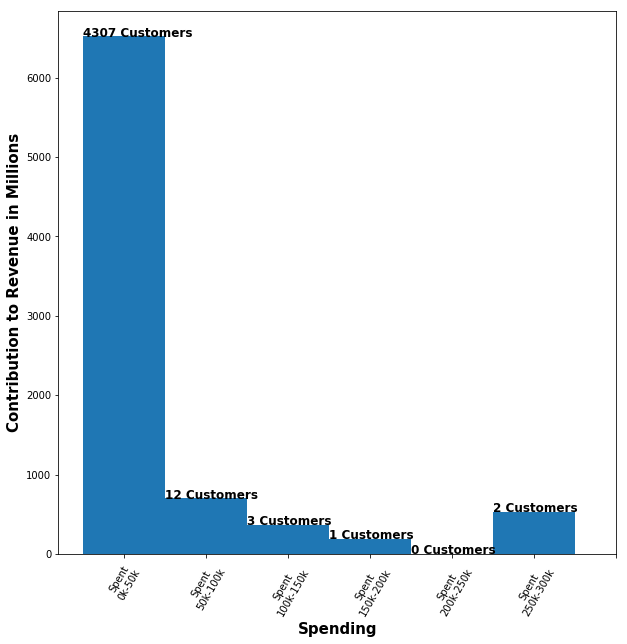

In [5]:
#ignoring customers who causes losses because they are small portion of revenue
temp  = data.groupby(['CustomerID'])['TotalRevenue'].apply(np.sum).reset_index(drop=0)
bins=range(0,300001,50000)
xx=plt.hist(temp['TotalRevenue'],bins=bins)
print (xx)
plt.close()
plt.subplots(figsize=(10,10))
xxx=plt.hist(temp['TotalRevenue'],weights = temp['TotalRevenue'].values/1000, bins=bins)
for i in range(len(xxx[1])-1):
    plt.text(xxx[1][i],xxx[0][i]+0.03,str(int(xx[0][i]))+' Customers',fontsize=12,fontweight='bold')
plt.xticks(np.array(bins)+25000,['Spent\n' + str(bins[x]/1000)+'k-'+str(bins[x+1]/1000)+'k' for x in  range(len(bins)-1)],rotation=60)
plt.xlabel('Spending',fontsize=15,fontweight='bold')
plt.ylabel('Contribution to Revenue in Millions',fontsize=15,fontweight='bold')
plt.show()

In [6]:
#combine certain stock types which are obviously simillar differetn colour t-shirts
def f(x):
    if  x[:-1].isdigit() and x[-1].isdigit() is False:
        return x[:-1]
    else : return x
data['StockCode_NR'] = data['StockCode'].apply(f)

#returns cost 0.1%, so ignore first
data = data[data['TotalRevenue']>0].reset_index(drop=True)

(0, 'Top 0.01 percent of customers,3.0 percent of profit')
(4, 'Top 0.1 percent of customers,12.0 percent of profit')
(43, 'Top 1 percent of customers,32.0 percent of profit')
(86, 'Top 2 percent of customers,39.0 percent of profit')
(216, 'Top 5 percent of customers,50.0 percent of profit')
(433, 'Top 10 percent of customers,61.0 percent of profit')
(867, 'Top 20 percent of customers,75.0 percent of profit')
(2169, 'Top 50 percent of customers,92.0 percent of profit')


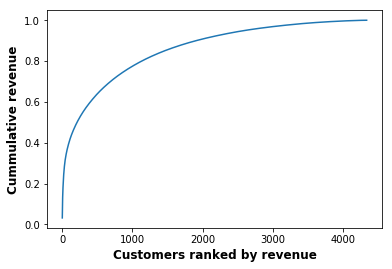

In [7]:
# are there any subgroups of important customer
temp = data.groupby(['CustomerID',])['TotalRevenue'].apply(sum).reset_index(drop=False)
temp2 = temp.sort_values('TotalRevenue').iloc[::-1].reset_index(drop=True)
result,val = [] ,0
for i in range(len(temp2)):
    val += temp2.iloc[i]['TotalRevenue']
    result += [val,]
temp2['cummulative_profit'] = np.array(result)/val
for i in [0.01,0.1,1,2,5,10,20,50]:
    num = int(len(temp2)*1.*i/100)
    print (num,'Top %s percent of customers,%s percent of profit'%(i,100*np.round(temp2.loc[num]['cummulative_profit'],2)))
plt.plot(temp2['cummulative_profit']);
plt.xlabel('Customers ranked by revenue',fontsize=12,fontweight='bold')
plt.ylabel('Cummulative revenue',fontsize=12,fontweight='bold')
plt.show()

(0, 'Top 0.01 percent of products,2.0 percent of profit')
(3, 'Top 0.1 percent of products,6.0 percent of profit')
(32, 'Top 1 percent of products,20.0 percent of profit')
(64, 'Top 2 percent of products,28.000000000000004 percent of profit')
(160, 'Top 5 percent of products,44.0 percent of profit')
(320, 'Top 10 percent of products,59.0 percent of profit')
(640, 'Top 20 percent of products,76.0 percent of profit')
(1600, 'Top 50 percent of products,95.0 percent of profit')
(1920, 'Top 60 percent of products,97.0 percent of profit')


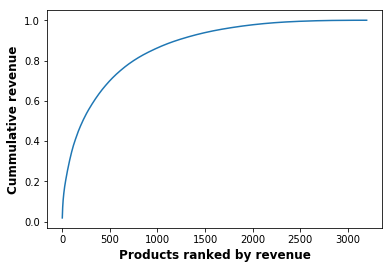

In [8]:
# are there any subgroups of important customer
temp = data.groupby(['StockCode_NR'])['TotalRevenue'].apply(sum).reset_index(drop=False)
temp['totalRev_over_time'] = data.groupby(['StockCode_NR'])['TotalRevenue'].apply(np.sum).reset_index(drop=True)
temp2 = temp.sort_values('totalRev_over_time').iloc[::-1].reset_index(drop=True)

result,val = [0,] ,0
for i in range(len(temp2)):
    val += temp2.iloc[i]['TotalRevenue']
    result += [val,]
temp2['cummulative_profit'] = np.array(result[1:])/val
temp2['Total_profit'] = (np.array(result[1:])-np.array(result[:-1]))/val
for i in [0.01,0.1,1,2,5,10,20,50,60]:
    num = int(len(temp2)*1.*i/100)
    print (num,'Top %s percent of products,%s percent of profit'%(i,100*np.round(temp2.loc[num]['cummulative_profit'],2)))
plt.plot(temp2['cummulative_profit'])
x = 600 #coresponds to  97% products
#print (np.sum(temp2['totalRev_over_time']>x),'threshold=',x,',',np.round(np.mean(temp2['totalRev_over_time']>x),2),'of products account for',np.round(np.sum(temp2[temp2['totalRev_over_time']>x]['TotalRevenue'])/np.sum(temp2['TotalRevenue']),3),'of revenue\n\n')
temp3 = temp2[temp2['totalRev_over_time']>x]
data2 = pd.merge(data,temp3[['StockCode_NR','totalRev_over_time','Total_profit']]
         ,on='StockCode_NR',how='inner')
plt.xlabel('Products ranked by revenue',fontsize=12,fontweight='bold')
plt.ylabel('Cummulative revenue',fontsize=12,fontweight='bold')
plt.show()

In [9]:
customer_info = data.groupby(['CustomerID',])['TotalRevenue'].apply(sum).reset_index(drop=False)
customer_info = customer_info.sort_values('TotalRevenue').iloc[::-1].reset_index(drop=False)

for year in pd.unique(data.Year):
    for month in sorted(map(int,pd.unique(data.Month))):
        temp0  =  data2[(data2.Year==year) & (data2.Month==month)]
        if len(temp0) == 0:
            continue
        temp = temp0.groupby(['CustomerID',])['TotalRevenue'].apply(sum).reset_index(drop=False)
        temp2 = temp.sort_values('TotalRevenue').iloc[::-1].reset_index(drop=True)
        result,val = [] ,0
        for i in range(len(temp2)):
            val += temp2.iloc[i]['TotalRevenue']
            result += [val,]
        temp2['cummulative_profit'] = np.array(result)/val
        temp2.rename(columns={'TotalRevenue' : 'Revenue_%s_%s'%(year,month)},inplace=True)
        customer_info = pd.merge(customer_info,temp2[temp2.keys()[:2]],on='CustomerID',how='left').fillna(0)

from collections import Counter
temp2 = data.groupby(['CustomerID',])['Country'].apply(lambda x:Counter(list(x)).most_common(1)[0][0]).reset_index(drop=False)
customer_info = pd.merge(customer_info,temp2[temp2.keys()[:2]],on='CustomerID',how='left').fillna(0)

In [10]:
dictt_StockCode = {}
counter = 0
for i in data2.groupby(['totalRev_over_time','StockCode_NR'])['TotalRevenue'].apply(sum).reset_index(drop=False)['StockCode_NR'].iloc[::-1]:
    dictt_StockCode[i] = counter
    counter += 1
data2['StockCode_NR_int'] = data2['StockCode_NR'].map(dictt_StockCode)
#print (counter)

products... largest sales


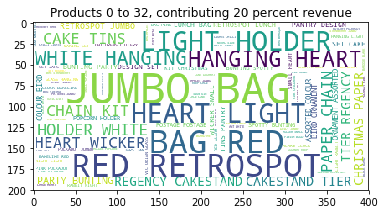

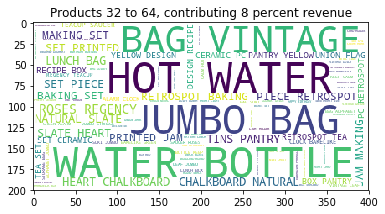

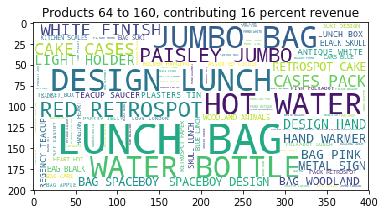

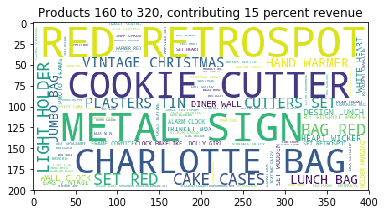

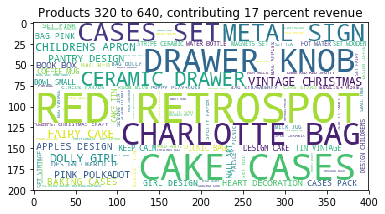

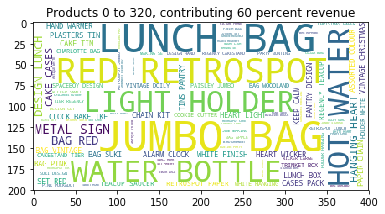

In [11]:
'''0 Top 0.01 percent of products,2.0 percent of profit
3 Top 0.1 percent of products,6.0 percent of profit
32 Top 1 percent of products,20.0 percent of profit
64 Top 2 percent of products,28.000000000000004 percent of profit
160 Top 5 percent of products,44.0 percent of profit
320 Top 10 percent of products,59.0 percent of profit
640 Top 20 percent of products,76.0 percent of profit'''
from wordcloud import WordCloud
print ('products... largest sales')
ranges =[(0,32,20),(32,64,8),(64,160,16),(160,320,15),(320,640,17),(0,320,60)]
for j in ranges:
    stock_code_decribe = data2.groupby('StockCode_NR_int')['Description'].apply(list).reset_index(drop=False)
    closest_pdts = range(j[0],j[1])
    #print stock_code_decribe[stock_code_decribe.StockCode_NR_int.isin(closest_pdts)]
    text = ''
    for k in stock_code_decribe[stock_code_decribe.StockCode_NR_int.isin(closest_pdts)]['Description'].values:
        for i in k[::10]:
            text = text+' ' + i
    wordcloud = WordCloud().generate(text)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.title('Products %s to %s, contributing %s percent revenue'%j)
    plt.imshow(wordcloud);plt.show()

In [12]:
#find the stats price of each product,
data2_product = data2.groupby('StockCode_NR_int')['UnitPrice'].apply(np.array).reset_index(drop=False)
data2_product['UnitPrice_median'] = data2_product['UnitPrice'].apply(np.median)
data2_product['UnitPrice_mean'] = data2_product['UnitPrice'].apply(np.mean)
data2_product['UnitPrice_std'] = data2_product['UnitPrice'].apply(np.std)
data2_product['UnitPrice_25%'] = data2_product['UnitPrice'].apply(lambda x : np.percentile(x,25))
data2_product['UnitPrice_75%'] = data2_product['UnitPrice'].apply(lambda x : np.percentile(x,75))
del data2_product['UnitPrice'] 
data2 = pd.merge(data2,data2_product,on='StockCode_NR_int',how='left')
data2['Discount_given'] = 1.*(1*(data2['UnitPrice'] < data2['UnitPrice_median']) +
                           1*(data2['UnitPrice'] < data2['UnitPrice_25%']) +
                           1*(data2['UnitPrice'] < data2['UnitPrice_75%']) )

# Convert data to train, validation, four test sets test2-test5

In [13]:
train = data2[((data2['Year']==2010)*(data2['Month'].isin([12,]))) | \
              ((data2['Year']==2011)*(data2['Month'].isin([1,2,3,4])))]
test = data2[ ((data2['Year']==2011)*(data2['Month'].isin([5])))] #this is validation
test2 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,])))] #jun 2011
test3 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([7,])))] #jul 2011
test4 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,7,])))] #test data is from jun-jul 2011
test5 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,7,8,9,10,11])))] #test data is from jun-nov 2011

len(train),len(test),len(test2),len(test3),len(test4),len(test5)

/home/leexiongan/anaconda3/envs/python27/lib/python2.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


(105613, 26611, 25407, 24897, 50304, 219801)

In [14]:
#get all orders from customer during time period 
Invoice = train.groupby(['CustomerID',]).apply(lambda x :(list(x['StockCode_NR_int']),
                                                         list(x['Quantity']))).reset_index(drop=0)
#print Invoice.head()
customer_info_orders = pd.merge(customer_info,Invoice,on='CustomerID',how='outer')
customer_info_orders.rename(columns={0 : 'orders'},inplace=True)

Invoice_future = test.groupby(['CustomerID',]).apply(lambda x :(list(x['StockCode_NR_int']),
                                                         list(x['Quantity']))).reset_index(drop=0)
#print Invoice.head()
customer_info_orders = pd.merge(customer_info_orders,Invoice_future,on='CustomerID',how='outer')
customer_info_orders.rename(columns={0 : 'orders_future'},inplace=True)

Invoice_future = test2.groupby(['CustomerID',]).apply(lambda x :(list(x['StockCode_NR_int']),
                                                         list(x['Quantity']))).reset_index(drop=0)
#print Invoice.head()
customer_info_orders = pd.merge(customer_info_orders,Invoice_future,on='CustomerID',how='outer')
customer_info_orders.rename(columns={0 : 'orders_future2'},inplace=True)

Invoice_future = test3.groupby(['CustomerID',]).apply(lambda x :(list(x['StockCode_NR_int']),
                                                         list(x['Quantity']))).reset_index(drop=0)
#print Invoice.head()
customer_info_orders = pd.merge(customer_info_orders,Invoice_future,on='CustomerID',how='outer')
customer_info_orders.rename(columns={0 : 'orders_future3'},inplace=True)

Invoice_future = test4.groupby(['CustomerID',]).apply(lambda x :(list(x['StockCode_NR_int']),
                                                         list(x['Quantity']))).reset_index(drop=0)
#print Invoice.head()
customer_info_orders = pd.merge(customer_info_orders,Invoice_future,on='CustomerID',how='outer')
customer_info_orders.rename(columns={0 : 'orders_future4'},inplace=True)

Invoice_future = test5.groupby(['CustomerID',]).apply(lambda x :(list(x['StockCode_NR_int']),
                                                         list(x['Quantity']))).reset_index(drop=0)
#print Invoice.head()
customer_info_orders = pd.merge(customer_info_orders,Invoice_future,on='CustomerID',how='outer')
customer_info_orders.rename(columns={0 : 'orders_future5'},inplace=True)

#get discount given to each customer during training phase
discount_rating = train.groupby('CustomerID')['Discount_given'].apply(np.mean).reset_index(drop=0)
customer_info_orders = pd.merge(customer_info_orders,discount_rating,on='CustomerID',how='outer')

#get num_orders in time frame
orders = train.groupby('CustomerID')['InvoiceNo'].apply(lambda x : len(np.unique(x))).reset_index(drop=0)
orders.rename(columns={'InvoiceNo' : 'Num_invoices_during_train'},inplace=True)
customer_info_orders = pd.merge(customer_info_orders,orders,on='CustomerID',how='outer')


customer_info_orders = customer_info_orders.sort_values('CustomerID').reset_index(drop=True)

# Get orders in training set for all customers

In [15]:
customer_info_orders.head()

,index,CustomerID,TotalRevenue,Revenue_2010_12,Revenue_2011_1,Revenue_2011_2,Revenue_2011_3,Revenue_2011_4,Revenue_2011_5,Revenue_2011_6,...,Revenue_2011_12,Country,orders,orders_future,orders_future2,orders_future3,orders_future4,orders_future5,Discount_given,Num_invoices_during_train
0,0,12346.0,77183.60,0.00,77183.60,0.0,0.0,0.00,0.0,0.00,...,0.00,United Kingdom,"([4], [74215])",NaN,NaN,NaN,NaN,NaN,3.000000,1.0
1,1,12347.0,4310.00,568.15,462.55,0.0,0.0,602.05,0.0,382.52,...,201.42,Iceland,"([1394, 1, 1, 343, 225, 733, 733, 102, 102, 7,...",NaN,"([30, 325, 564, 631, 939, 1567, 1797, 775, 142...",NaN,"([30, 325, 564, 631, 939, 1567, 1797, 775, 142...","([1, 1, 214, 343, 343, 225, 225, 733, 102, 34,...",0.202703,3.0
2,2,12348.0,1797.24,852.00,207.04,0.0,0.0,367.00,0.0,0.00,...,0.00,Finland,"([911, 158, 158, 298, 298, 343, 225, 225, 943,...",NaN,NaN,NaN,NaN,"([6, 248, 156], [1, 96, 120])",0.730769,3.0
3,3,12349.0,1757.55,0.00,0.00,0.0,0.0,0.00,0.0,0.00,...,0.00,Italy,NaN,NaN,NaN,NaN,NaN,"([32, 697, 59, 1, 307, 70, 330, 157, 202, 198,...",NaN,NaN
4,4,12350.0,334.40,0.00,0.00,259.1,0.0,0.00,0.0,0.00,...,0.00,Norway,"([143, 270, 40, 6, 1333, 1826, 1248, 367, 1758...",NaN,NaN,NaN,NaN,NaN,0.230769,1.0


# Get customer-items matrix. Keeping to 0 if item not brought, and 1 if item brought
# # ## Row reprsent customers and columns represents items 1-1853 (contributing 97% of revenue)

In [16]:
matrix_past = np.zeros((len(customer_info_orders),counter)).astype(np.float32)
for i in range(len(customer_info_orders)):
    try:
        pdt,quantity = customer_info_orders.iloc[i]['orders']
        for j,k in zip(pdt,quantity):
            matrix_past[i,j] += k
    except TypeError : None #no orders presetn
matrix_past = 1*(matrix_past>0)
import gc 
gc.collect()
print (matrix_past)

[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
matrix_future = np.zeros((len(customer_info_orders),counter)).astype(np.float32)
for i in range(len(customer_info_orders)):
    try:
        pdt,quantity = customer_info_orders.iloc[i]['orders_future']
        for j,k in zip(pdt,quantity):
            matrix_future[i,j] += k
    except TypeError : None #no orders presetn

import gc 
gc.collect()

0

In [18]:
matrix_future2 = np.zeros((len(customer_info_orders),counter)).astype(np.float32)
for i in range(len(customer_info_orders)):
    try:
        pdt,quantity = customer_info_orders.iloc[i]['orders_future2']
        for j,k in zip(pdt,quantity):
            matrix_future2[i,j] += k
    except TypeError : None #no orders presetn

import gc 
gc.collect()

0

In [19]:
matrix_future3 = np.zeros((len(customer_info_orders),counter)).astype(np.float32)
for i in range(len(customer_info_orders)):
    try:
        pdt,quantity = customer_info_orders.iloc[i]['orders_future3']
        for j,k in zip(pdt,quantity):
            matrix_future3[i,j] += k
    except TypeError : None #no orders presetn

import gc 
gc.collect()

0

In [20]:
matrix_future4 = np.zeros((len(customer_info_orders),counter)).astype(np.float32)
for i in range(len(customer_info_orders)):
    try:
        pdt,quantity = customer_info_orders.iloc[i]['orders_future4']
        for j,k in zip(pdt,quantity):
            matrix_future4[i,j] += k
    except TypeError : None #no orders presetn

import gc 
gc.collect()

0

In [21]:
matrix_future5 = np.zeros((len(customer_info_orders),counter)).astype(np.float32)
for i in range(len(customer_info_orders)):
    try:
        pdt,quantity = customer_info_orders.iloc[i]['orders_future5']
        for j,k in zip(pdt,quantity):
            matrix_future5[i,j] += k
    except TypeError : None #no orders presetn

import gc 
gc.collect()

0

# Dimentionality reduction of customer-items matrix using SVD

In [22]:
# recommendation system , for our case since entries are small, we use SVD to do matrix factorization
# instead of a less expensive but approximate algorithm like alternating last squares. WARNING This is not scalable. 
U,D,V = np.linalg.svd(matrix_past)

(1000, 'dims can represent:', 0.9111009012648562, 'of matrix')


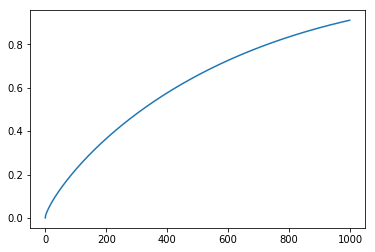

In [23]:
num = 1000
U2=U[:,:num]
D2=D[:num]
V2=V[:num]
Z = sum(D)
print (num,'dims can represent:',sum(D2)/Z,'of matrix')
plt.plot(list(map(lambda x : np.sum(D[:x])/Z,range(len(D2)))))
plt.show()
#print matrix_past
#np.matmul(np.matmul(U2,np.diag(D2)),V2)

In [24]:
for i in range(counter):
    customer_info_orders['pdt_'+str(i)] = matrix_past[:,i].astype(np.uint16)
for i in range(U2.shape[1]):
    customer_info_orders['svd_'+str(i)] = U2[:,i].astype(np.float32)

In [25]:
colsA =  ['Revenue_2011_' + str(x) for x in [1,2,3,4]]+['Revenue_2010_12']
#print np.corrcoef(customer_info_orders['target2'].values,
#           np.mean(np.log10(1+customer_info_orders[colsA].values),1))

In [26]:
customer_info_orders.keys()[3:8]

Index([u'Revenue_2010_12', u'Revenue_2011_1', u'Revenue_2011_2',
       u'Revenue_2011_3', u'Revenue_2011_4'],
      dtype='object')

# Predict future revenue from past revenue.
# # # evaluation criteria is rmse(log(y_pred))

In [27]:
# SQUARED LOGLOSS
#predict customer orders
import xgboost as  xgb
'''
train = data2[((data2['Year']==2010)*(data2['Month'].isin([12,]))) | \
              ((data2['Year']==2011)*(data2['Month'].isin([1,2,3,4])))]
test = data2[ ((data2['Year']==2011)*(data2['Month'].isin([5])))]
test2 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,])))]
test3 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([7,])))]
test4 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,7,])))]
test5 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,7,8,9,10,11])))]

len(train),len(test),len(test2),len(test3),len(test4),len(test5)
'''
customer_info_orders.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in customer_info_orders.columns.values]

predictors = list(customer_info_orders.keys()[3:8])+['Num_invoices_during_train','mean_log_rev_train','Discount_given','Country']+\
                     list([x for x in customer_info_orders.keys() if 'svd' in str(x)]) [:3]
colsA =  ['Revenue_2011_' + str(x) for x in [1,2,3,4]]+['Revenue_2010_12']
customer_info_orders['mean_log_rev_train']= np.log10(1+np.mean(customer_info_orders[colsA].values,1))
z = customer_info_orders[['pdt_'+str(x) for x in range(100)]].describe().loc['mean']
#predictors += list(z[z>0.03].index)
target = 'target'
gc.collect()
for i in range(2,6):
    cols = [[0,],[0,],[6,],[7,],[8,],[6,7,8]][i]
    cols = ['Revenue_2011_'+str(x) for x in cols]
    customer_info_orders[target+str(i)]= np.log10(1+np.mean(customer_info_orders[cols].values,1))

if True:
    customer_info_orders2 = customer_info_orders.copy()
    dicttt = {}
    counter =0
    for i in sorted(pd.unique(customer_info_orders2.Country)):
        dicttt[i] = counter
        counter += 1
    customer_info_orders2 ['Country'] = customer_info_orders2 ['Country'].map(dicttt)
    customer_info_orders2 = customer_info_orders2[customer_info_orders2['mean_log_rev_train']>0] #remove datapoints which have not brought stuff
    customer_info_orders2[target]= np.log10(1+np.mean(customer_info_orders2[['Revenue_2011_5',]].values,1))
    train_id = [x for x in range(len(customer_info_orders2)) if x%5!=0]
    test_id = [x for x in range(len(customer_info_orders2)) if x%5==0]
    dtrain = customer_info_orders2.iloc[train_id]
    dcv = customer_info_orders2.iloc[test_id]
    dtest = customer_info_orders2
    gc.collect()
    params = {}
    params["objective"] = "reg:linear"
    params["eta"] = 0.01/10
    params["min_child_weight"] = 1
    params["subsample"] = 0.3
    params["colsample_bytree"] = 0.3
    params["scale_pos_weight"] = 1.0
    params["silent"] = 1
    params["verbose"] = 1
    params["max_depth"] = 5
    #params["nthread"] = 6
    params["nthread"] = -1
    early_stopping_rounds = 50
    plst = list(params.items())
    xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
    xgcv = xgb.DMatrix(dcv[predictors].values, label=dcv[target].values)
    xgtest2 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'2'].values)
    xgtest3 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'3'].values)
    xgtest4 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'4'].values)
    xgtest5 = xgb.DMatrix(dtest[predictors].values, label=dtest[target+'5'].values)
    #    xgb.train(xgtrain[predictors],dtrain['Demanda_uni_equil'],eval_set=evallist ,
    #            eval_metric='rmse', early_stopping_rounds=early_stopping_rounds)
    watchlist  = [ (xgtrain,'train'),(xgtest2,'2month'),(xgtest3,'3month'),
                  (xgtest4,'4month'),(xgtest5,'5month'),(xgcv,'eval')][:]
    a = {}
    model=xgb.train(plst,xgtrain,10*5510,watchlist,verbose_eval =1000,feval=None,
                    early_stopping_rounds=early_stopping_rounds*3,evals_result=a)
    print (np.corrcoef(np.nan_to_num(np.log10(model.predict(xgtest2)[test_id])),
                      customer_info_orders2[target].iloc[test_id]))
    val = 0
    for j in range(2,6):
        j = str(j)
        customer_info_orders2['pred'+j] = model.predict(xgtest2)
        xxxx = np.corrcoef(model.predict(xgtest2),customer_info_orders2['target'+j])
        xxxx = np.mean((model.predict(xgtest2)-customer_info_orders2['target'+j])**2)**.5
        val += xxxx
        print (xxxx)
        
    print ('final validation over four test sets',val/4)

[0]	train-rmse:1.26038	2month-rmse:1.19737	3month-rmse:1.19098	4month-rmse:1.18091	5month-rmse:1.33505	eval-rmse:1.30248
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 150 rounds.
[1000]	train-rmse:1.05798	2month-rmse:1.05679	3month-rmse:1.04939	4month-rmse:1.0462	5month-rmse:1.12217	eval-rmse:1.14287
[2000]	train-rmse:0.980805	2month-rmse:1.03021	3month-rmse:1.02089	4month-rmse:1.02103	5month-rmse:1.05577	eval-rmse:1.10558
[3000]	train-rmse:0.939701	2month-rmse:1.02896	3month-rmse:1.01803	4month-rmse:1.01907	5month-rmse:1.03581	eval-rmse:1.09922
Stopping. Best iteration:
[3352]	train-rmse:0.928361	2month-rmse:1.02974	3month-rmse:1.01834	4month-rmse:1.01938	5month-rmse:1.03318	eval-rmse:1.09874

[[1.         0.44589235]
 [0.44589235 1.        ]]
1.0301965785953149
1.0186250399269114
1.0196398717710018
1.0320463469193484
('final validation over four test sets', 1.0251269593031442)


# Plot important factors vs target5 (log(average rev for Jun-Nov 2011))

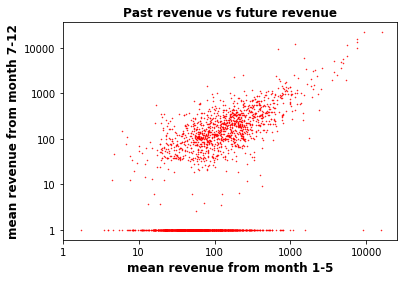

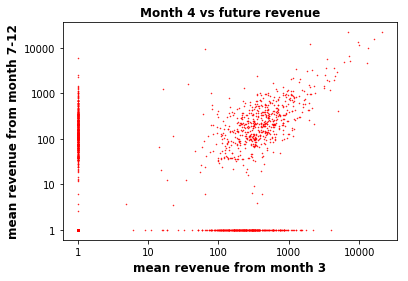

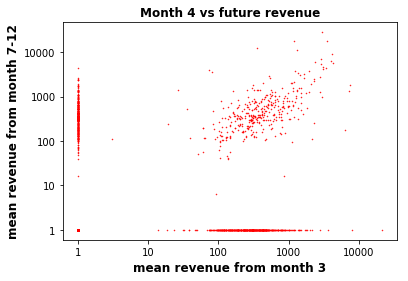

/home/leexiongan/anaconda3/envs/python27/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


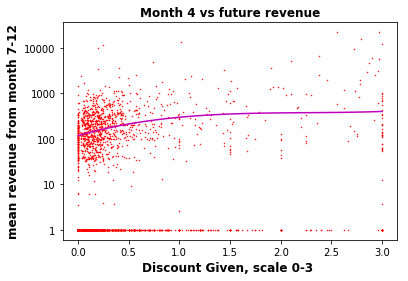

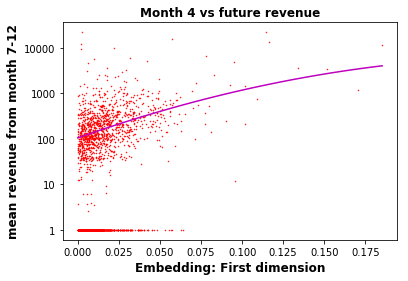

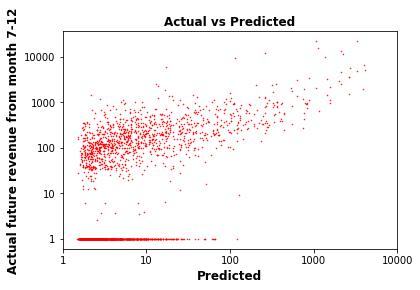

In [28]:
plt.plot(customer_info_orders2['mean_log_rev_train'],customer_info_orders2['target5'],'ro',markersize=0.5)
plt.xlabel('mean revenue from month 1-5',weight='bold',fontsize=12)
plt.ylabel('mean revenue from month 7-12',weight='bold',fontsize=12)
plt.title('Past revenue vs future revenue',weight='bold',fontsize=12)
plt.xticks(range(5),[10**x for x in range(5)])
plt.yticks(range(5),[10**x for x in range(5)])
plt.show()
plt.close()
plt.plot(np.log10(1+customer_info_orders2['Revenue_2011_3']),customer_info_orders2['target5'],'ro',markersize=0.5)
plt.xlabel('mean revenue from month 3',weight='bold',fontsize=12)
plt.ylabel('mean revenue from month 7-12',weight='bold',fontsize=12)
plt.title('Month 4 vs future revenue',weight='bold',fontsize=12)
plt.xticks(range(5),[10**x for x in range(5)])
plt.yticks(range(5),[10**x for x in range(5)])
plt.show()
plt.plot(np.log10(1+customer_info_orders2['Revenue_2011_4']),
         np.log10(1+customer_info_orders2['Revenue_2011_5']),'ro',markersize=0.5)
plt.xlabel('mean revenue from month 3',weight='bold',fontsize=12)
plt.ylabel('mean revenue from month 7-12',weight='bold',fontsize=12)
plt.title('Month 4 vs future revenue',weight='bold',fontsize=12)
plt.xticks(range(5),[10**x for x in range(5)])
plt.yticks(range(5),[10**x for x in range(5)])
plt.show()
from sklearn.linear_model import LogisticRegression

LogisticRegression()
def four_degree_polynomial(X,y,n=3):
    X1 = X[y>0]
    y1 = y[y>0]
    X2 = np.stack([X1**i for i in range(0,n)],-1)
    B = np.matmul(np.matmul(np.linalg.inv(np.matmul(X2.T,X2)),X2.T),y1.values)
    X3 = np.linspace(min(X),max(X),100)
    X4 = np.stack([X3**i for i in range(0,n)],-1)
    y4 = np.matmul(X4,B)
    return X3,y4,LogisticRegression().fit(np.stack([X**i for i in range(0,n)],-1),1*(y>0)).predict_proba(X4)[:,1]

plt.plot(customer_info_orders2['Discount_given'],customer_info_orders2['target5'],'ro',markersize=0.5)
a,b,c = four_degree_polynomial(customer_info_orders2['Discount_given'],customer_info_orders2['target5'],n=4)
plt.plot(a,b,'m')
#plt.plot(a,3*(np.log10(c)+1),'c')
plt.xlabel('Discount Given, scale 0-3 ',weight='bold',fontsize=12)
plt.ylabel('mean revenue from month 7-12',weight='bold',fontsize=12)
plt.title('Month 4 vs future revenue',weight='bold',fontsize=12)
#plt.xticks(range(5),[10**x for x in range(5)])
plt.yticks(range(5),[10**x for x in range(5)])
plt.show()


plt.plot(customer_info_orders2['svd_0'],customer_info_orders2['target5'],'ro',markersize=0.5)
a,b,c = four_degree_polynomial(customer_info_orders2['svd_0'],customer_info_orders2['target5'],n=3)
plt.plot(a,b,'m')
#plt.plot(a,3*(np.log10(c)+1),'c')
plt.xlabel('Embedding: First dimension',weight='bold',fontsize=12)
plt.ylabel('mean revenue from month 7-12',weight='bold',fontsize=12)
plt.title('Month 4 vs future revenue',weight='bold',fontsize=12)
#plt.xticks(range(5),[10**x for x in range(5)])
plt.yticks(range(5),[10**x for x in range(5)])
plt.show()

plt.plot(model.predict(xgtest2),customer_info_orders2['target5'],'ro',markersize=0.5)
#plt.plot(a,3*(np.log10(c)+1),'c')
plt.xlabel('Predicted',weight='bold',fontsize=12)
plt.ylabel('Actual future revenue from month 7-12',weight='bold',fontsize=12)
plt.title('Actual vs Predicted',weight='bold',fontsize=12)
plt.xticks(range(5),[10**x for x in range(5)])
plt.yticks(range(5),[10**x for x in range(5)])
plt.show()

In [29]:
#%pip install xgbfir
import xgbfir
xgbfir.saveXgbFI(model,MaxTrees =2000,feature_names=predictors )
xgb_explain = pd.read_excel('./XgbFeatureInteractions.xlsx')
print (xgb_explain.sort_values('Gain').iloc[::-1,:2])

                  Interaction          Gain
0          mean_log_rev_train  50218.099428
1              Revenue_2011_3  30507.117602
2   Num_invoices_during_train  29567.383428
3                       svd_0  28001.729156
4                       svd_1  24142.436418
5                       svd_2  21792.459761
6              Revenue_2011_2  20246.405905
7              Discount_given  19157.649993
8              Revenue_2011_1  19116.967537
9              Revenue_2011_4  18227.306649
10            Revenue_2010_12  15276.411424
11                    Country   4224.672045


1940
364
97
24


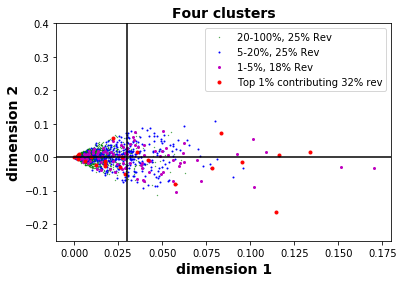

In [30]:
col = ['r','m','b','g'][::-1]
percentile = [(0,1),(1,5),(5,20),(20,100)][::-1]
size= [3,2,1,0.3][::-1]
labels = ['Top 1% contributing 32% rev','1-5%, 18% Rev','5-20%, 25% Rev','20-100%, 25% Rev'][::-1]
temp = customer_info_orders[customer_info_orders['mean_log_rev_train'] >0].sort_values('mean_log_rev_train').iloc[::-1].reset_index(drop=True)
for i in range(4):
    a,b = 0.01*len(temp)*percentile[i][0],0.01*len(temp)*percentile[i][1]
    a,b = int(a),int(b)
    plt.plot(temp['svd_0'].iloc[a:b],temp['svd_1'].iloc[a:b],'o',
             color=col[i],markersize=size[i],label=labels[i])
    print (len(temp['svd_0'].iloc[a:b]))
plt.ylim(-0.25,0.4)
plt.xlim(-0.01,0.180)
plt.legend()
plt.xlabel('dimension 1',fontweight='bold',fontsize=14)
plt.ylabel('dimension 2',fontweight='bold',fontsize=14)

plt.title('Four clusters',fontweight='bold',fontsize=14)
plt.plot([0.03,0.03],[-1,1],'k')
plt.plot([-1,1],[0,0],'k')
plt.show()

In [31]:
num = np.array(range(3))
U2=U[:,num]
D2=D[num]
V2=V[num]

Customer_embeddings = U2
Product_embeddings = V2

# Clustering products, using three dimensions significant in customer revenue prediction

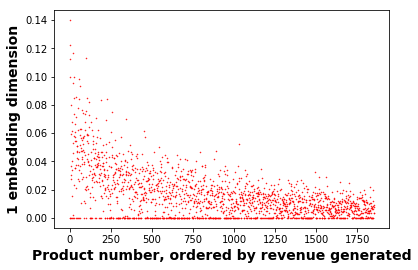

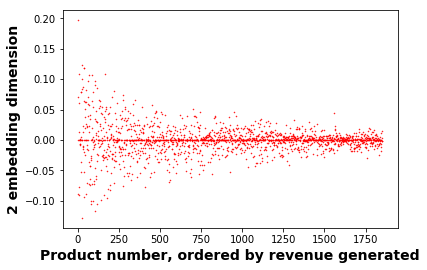

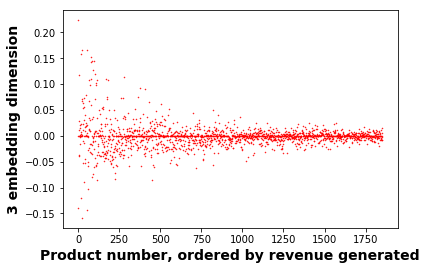

In [32]:
#visualise each dimension
for i in range(0,3):
    plt.plot(range(len(V2[0,:])),V2[i,:],'ro',markersize=.5);
    plt.xlabel('Product number, ordered by revenue generated',
               fontweight='bold',fontsize=14)
    plt.ylabel('%s embedding dimension'%(i+1),
               fontweight='bold',fontsize=14)
    
    plt.show()

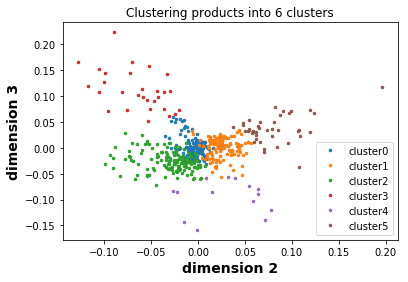

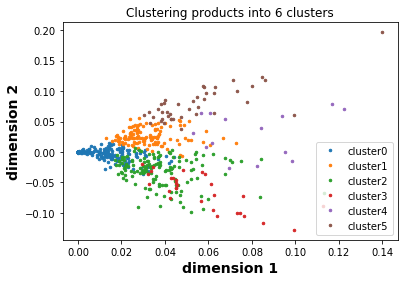

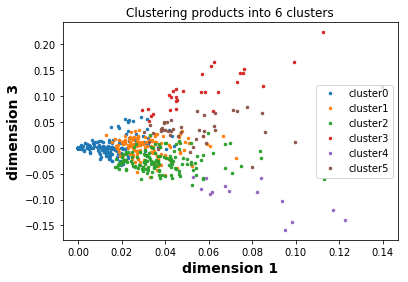

/home/leexiongan/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


('cluster', 0)
['PAPER CRAFT , LITTLE BIRDIE', 'MEDIUM CERAMIC TOP STORAGE JAR', 'RABBIT NIGHT LIGHT', "PAPER CHAIN KIT 50'S CHRISTMAS ", 'BLACK RECORD COVER FRAME', 'JUMBO BAG DOILEY PATTERNS', 'BUNTING , SPOTTY ', 'DOORMAT KEEP CALM AND COME IN', 'SET OF 3 REGENCY CAKE TINS', 'JUMBO BAG APPLES', 'HOT WATER BOTTLE KEEP CALM', 'JUMBO BAG ALPHABET', 'REGENCY TEAPOT ROSES ', 'SET OF TEA COFFEE SUGAR TINS PANTRY', 'JUMBO BAG VINTAGE LEAF', 'LUNCH BAG DOILEY PATTERN ', 'COLOUR GLASS. STAR T-LIGHT HOLDER', 'LUNCH BAG APPLE DESIGN', "JUMBO BAG 50'S CHRISTMAS ", 'ROTATING SILVER ANGELS T-LIGHT HLDR']
('cluster', 1)
['Manual', 'CHILLI LIGHTS', 'DOORMAT RED RETROSPOT', 'EDWARDIAN PARASOL NATURAL', 'DOORMAT NEW ENGLAND', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'VINTAGE UNION JACK MEMOBOARD', 'BLUE HAPPY BIRTHDAY BUNTING', 'DOORMAT FAIRY CAKE', 'VINTAGE UNION JACK BUNTING', 'SCOTTIE DOG HOT WATER BOTTLE', 'ANTIQUE SILVER T-LIGHT GLASS', 'DOORMAT FANCY FONT HOME SWEET HOME', 'RED RETROSPOT CAKE STA

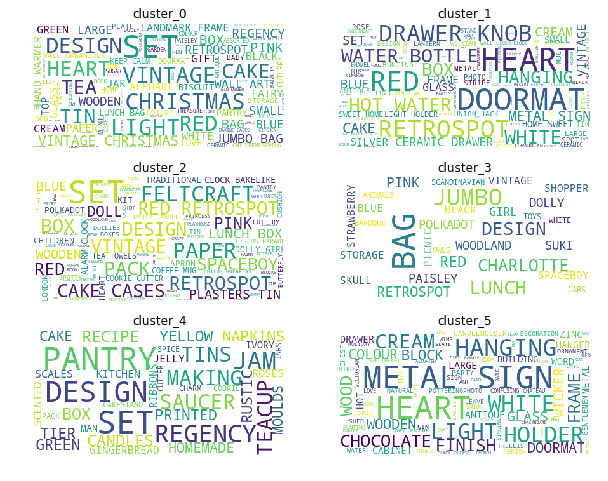

In [33]:

#clustering products into 6 classes
from sklearn.cluster import KMeans
from wordcloud import WordCloud

n=6
V2 = V2[:,:600]
kmeans = KMeans(n_clusters=n,random_state=123).fit(V2.T)
for i in range(n):
    plt.plot(V2[1,:][kmeans.labels_==i],V2[2,:][kmeans.labels_==i],'o',markersize=2.5,label='cluster'+str(i));
plt.xlabel('dimension 2',fontweight='bold',fontsize=14)
plt.title('Clustering products into 6 clusters')
plt.ylabel('dimension 3',fontweight='bold',fontsize=14)
plt.legend()
plt.show()
for i in range(n):
    plt.plot(V2[0,:][kmeans.labels_==i],V2[1,:][kmeans.labels_==i],'o',markersize=2.5,label='cluster'+str(i));
plt.xlabel('dimension 1',fontweight='bold',fontsize=14)
plt.title('Clustering products into 6 clusters')
plt.ylabel('dimension 2',fontweight='bold',fontsize=14)
plt.legend()
plt.show()
for i in range(n):
    plt.plot(V2[0,:][kmeans.labels_==i],V2[2,:][kmeans.labels_==i],'o',markersize=2.5,label='cluster'+str(i));
plt.xlabel('dimension 1',fontweight='bold',fontsize=14)
plt.title('Clustering products into 6 clusters')
plt.ylabel('dimension 3',fontweight='bold',fontsize=14)
plt.legend()
plt.show()
stock_code_decribe = data2.groupby('StockCode_NR_int')['Description'].apply(np.unique).reset_index(drop=False)
stock_code_decribe_top600 = stock_code_decribe.iloc[:600]
stock_code_decribe_top600['labels']= kmeans.labels_ 
fig,ax = plt.subplots(3,2,figsize=(10,8))

for j in range(n):
    print ('cluster',j)
    text = ''
    pdt_cluster_n = stock_code_decribe_top600[stock_code_decribe_top600['labels']==j]
    for i in pdt_cluster_n['Description'].apply(np.unique).values:
            text = text+' ' + i[0]
    wordcloud = WordCloud().generate(text)
    #print (np.mean(pdt_cluster_n.index[:40]))
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print (list(map(lambda x : str(x[0]),pdt_cluster_n['Description'].apply(np.unique).values[:20])))
    ax[j//2,j%2].imshow(wordcloud)
    ax[j//2,j%2].set_title('cluster_%s'%j)
    ax[j//2,j%2].axis('off')
plt.show()

these 0.540206185567 customers contribute 0.389964601875232 of revenue 


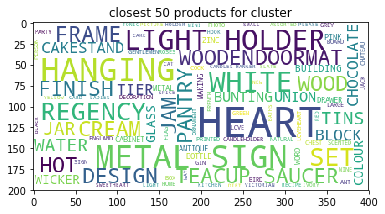

these 0.0548453608247 customers contribute 0.14536251543189224 of revenue 


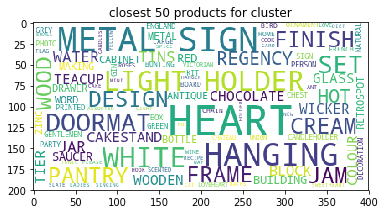

these 0.352164948454 customers contribute 0.27942061879007635 of revenue 


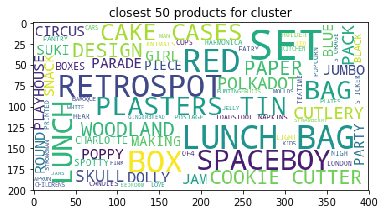

these 0.0527835051546 customers contribute 0.18525226390279947 of revenue 


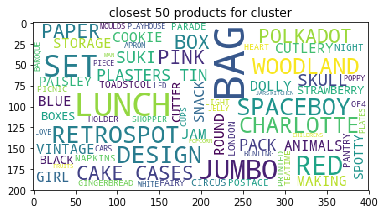

In [34]:
#looking at custers
cluster1 = customer_info_orders2[(customer_info_orders2['mean_log_rev_train']>0.0)&(customer_info_orders2['svd_0']<0.030)&(customer_info_orders2['svd_1']>0.00)]
cluster2 = customer_info_orders2[(customer_info_orders2['mean_log_rev_train']>0.0)&(customer_info_orders2['svd_0']>0.030)&(customer_info_orders2['svd_1']>0.00)]
cluster3 = customer_info_orders2[(customer_info_orders2['mean_log_rev_train']>0.0)&(customer_info_orders2['svd_0']<0.030)&(customer_info_orders2['svd_1']<0.00)]
cluster4 = customer_info_orders2[(customer_info_orders2['mean_log_rev_train']>0.0)&(customer_info_orders2['svd_0']>0.030)&(customer_info_orders2['svd_1']<0.00)]
product_cluster_cols = ['pdt_cluster_'+str(x) for x in range(6)]
df = pd.DataFrame(None,columns=product_cluster_cols)

kmeans2 = KMeans(n_clusters=4).fit(Customer_embeddings)
counter =0

for cluster in [cluster1,cluster2,cluster3,cluster4]:
    print ('these %s customers contribute %s of revenue ' %(1.*len(cluster)/len(temp),np.sum(10**cluster['mean_log_rev_train'])/np.sum(10**temp['mean_log_rev_train'])))

    U2_cluster = U2[cluster.index]
    cluster_affinity_product = np.matmul(U2_cluster,V2[:,:600])
    most_affinity_products = np.argsort(np.sum(cluster_affinity_product,0))[::-1]
    text = ''
    dist = np.sum((np.mean(U2_cluster,0)-kmeans.cluster_centers_)**2,1)**.5
    #dist =  np.sum(((kmeans2.cluster_centers_[counter])-kmeans.cluster_centers_)**2,1)**.5 #using kmeans to cluster
    df = df.append(pd.DataFrame([1/dist],columns=product_cluster_cols))
    #print (dist,np.argsort(dist))

    for i in stock_code_decribe[stock_code_decribe.StockCode_NR_int.isin(most_affinity_products[:50])]['Description'].apply(np.unique):
                text = text+' ' + i[0]
    wordcloud = WordCloud().generate(text)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    plt.title('closest 50 products for cluster')
    plt.imshow(wordcloud);plt.show()
    counter  += 1

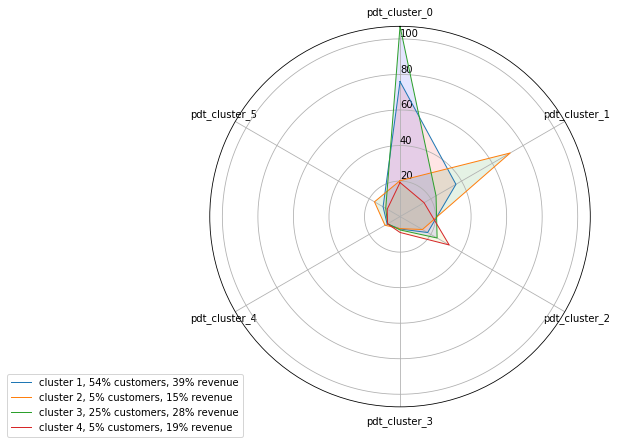

In [35]:
from math import pi
 
# Set data
df2 = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
fig,ax = plt.subplots(1,1,figsize=(7,7))
df['group'] = ['cluster_%s'%i for i in range(1,5)]
df = df[sorted(df.keys())].reset_index(drop=1)
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
#plt.yticks([0,100], [0,100], color="grey", size=7)
plt.ylim(0,np.max(df.iloc[:,1:].values))
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="cluster 1, 54% customers, 39% revenue")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="cluster 2, 5% customers, 15% revenue")
ax.fill(angles, values, 'g', alpha=0.1)

# Ind3
values=df.loc[2].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="cluster 3, 25% customers, 28% revenue")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind3
values=df.loc[3].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="cluster 4, 5% customers, 19% revenue")
ax.fill(angles, values, 'y', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

Recommendation for one customer, can be repeated for the other customers

In [36]:
#recommendation
pdt_cluster_n = stock_code_decribe_top600[stock_code_decribe_top600['labels']==1]
user1333 = cluster2.sort_values('TotalRevenue').iloc[::-1][['svd_0','svd_1','svd_2']].iloc[0]
print (user1333 )

svd_0    0.116257
svd_1    0.005743
svd_2   -0.020284
Name: 1333, dtype: float32


In [37]:
matrix_future5[1333,pdt_cluster_n.index]

print (pdt_cluster_n.index)
matrix_past[1333,pdt_cluster_n.index]

Int64Index([  9,  12,  32,  33,  45,  46,  48,  52,  54,  57,
            ...
            540, 541, 551, 554, 558, 562, 566, 576, 590, 592],
           dtype='int64', length=123)


array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [38]:
pdt_cluster_n['affinity_to_customer1333'] = np.sum((np.expand_dims(user1333,-1)-Product_embeddings[:,pdt_cluster_n.index])**2,0)
pdt_cluster_n['brought_customer1333'] = matrix_past[1333,pdt_cluster_n.index]
pdt_cluster_n.sort_values('affinity_to_customer1333').iloc[::-1]

/home/leexiongan/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/leexiongan/anaconda3/envs/python27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,StockCode_NR_int,Description,labels,affinity_to_customer1333,brought_customer1333
576,576,[METAL SIGN HER DINNER IS SERVED ],1,0.012934,1
468,468,[HANGING METAL HEART LANTERN],1,0.012386,0
532,532,[LAUNDRY 15C METAL SIGN],1,0.012270,1
227,227,[AREA PATROLLED METAL SIGN],1,0.012186,0
389,389,[LANTERN CREAM GAZEBO ],1,0.011772,0
244,244,[3 HEARTS HANGING DECORATION RUSTIC],1,0.011368,0
189,189,[DOORMAT BLACK FLOCK ],1,0.011300,0
136,136,[3 HOOK PHOTO SHELF ANTIQUE WHITE],1,0.011201,1
137,137,[BLACK HEART CARD HOLDER],1,0.011182,0
313,313,[DOORMAT 3 SMILEY CATS],1,0.010925,0


('products... largest sales', array([  3,   1,  21,  98,   2,   5,  25,  55,  22,  62,  37, 103,  26,
        59, 225, 193, 116,   8,  49,  77,  99, 259,  82,  24,  94, 120,
        39, 158, 343, 224]))
['REGENCY CAKESTAND 3 TIER', 'JUMBO  BAG BAROQUE BLACK WHITE', 'CREAM HANGING HEART T-LIGHT HOLDER', 'PARTY BUNTING', 'ASSORTED COLOUR BIRD ORNAMENT', 'SET OF 3 CAKE TINS PANTRY DESIGN ', 'JAM MAKING SET WITH JARS', 'HEART OF WICKER LARGE', 'LUNCH BAG RED RETROSPOT', 'HEART OF WICKER SMALL', 'NATURAL SLATE HEART CHALKBOARD ', 'PLEASE ONE PERSON METAL SIGN', 'RED HANGING HEART T-LIGHT HOLDER', 'JAM MAKING SET PRINTED', 'RECIPE BOX PANTRY YELLOW DESIGN', 'SET OF 6 SPICE TINS PANTRY DESIGN', 'LUNCH BAG SUKI  DESIGN ', 'LUNCH BAG  BLACK SKULL.', 'LUNCH BAG CARS BLUE', 'PACK OF 72 RETROSPOT CAKE CASES']


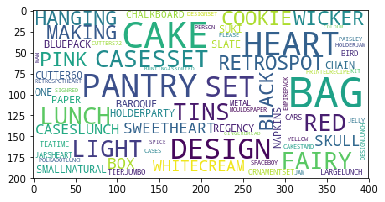

In [39]:
#get products with largest values for svd_0
from wordcloud import WordCloud

closest_to_inside = np.argsort(V2[0,:])[::-1]
stock_code_decribe = data2.groupby('StockCode_NR_int')['Description'].apply(np.unique).reset_index(drop=False)
closest_pdts = closest_to_inside[:30]
print ('products... largest sales',closest_pdts)
#print stock_code_decribe[stock_code_decribe.StockCode_NR_int.isin(closest_pdts)]
text = ''
for i in stock_code_decribe[stock_code_decribe.StockCode_NR_int.isin(closest_pdts)]['Description'].values:
    text = text + i[0]
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
print (list( map(lambda x : str(x[0]),
          stock_code_decribe[stock_code_decribe.StockCode_NR_int.isin(closest_pdts)]['Description'].values[:20])))
plt.imshow(wordcloud)
plt.show()

products... largest sales
['REGENCY CAKESTAND 3 TIER', 'CREAM HANGING HEART T-LIGHT HOLDER', 'ASSORTED COLOUR BIRD ORNAMENT', 'WOOD BLACK BOARD ANT WHITE FINISH', 'SET OF 3 CAKE TINS PANTRY DESIGN ', 'VICTORIAN GLASS HANGING T-LIGHT', 'HEART OF WICKER LARGE', 'HEART OF WICKER SMALL', 'GIN + TONIC DIET METAL SIGN', 'ROSES REGENCY TEACUP AND SAUCER ', 'NATURAL SLATE HEART CHALKBOARD ', 'PLEASE ONE PERSON METAL SIGN', 'RED HANGING HEART T-LIGHT HOLDER', 'CREAM SWEETHEART MINI CHEST', 'COOK WITH WINE METAL SIGN ', 'WOODEN PICTURE FRAME WHITE FINISH', 'GREEN REGENCY TEACUP AND SAUCER', 'WOODEN FRAME ANTIQUE WHITE ', '3 DRAWER ANTIQUE WHITE WOOD CABINET', 'HOME BUILDING BLOCK WORD']


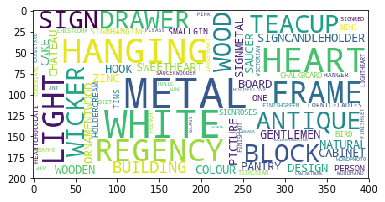

In [40]:

#get products with largest values for svd_1
closest_to_inside = np.argsort(V2[1,:])[::-1]
stock_code_decribe = data2.groupby('StockCode_NR_int')['Description'].apply(np.unique).reset_index(drop=False)
closest_pdts = closest_to_inside[:30]
print ('products... largest sales')
#print stock_code_decribe[stock_code_decribe.StockCode_NR_int.isin(closest_pdts)]
text = ''
for i in stock_code_decribe[stock_code_decribe.StockCode_NR_int.isin(closest_pdts)]['Description'].values:
    text = text + i[0]
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
print (list(map(lambda x : str(x[0]),
          stock_code_decribe[stock_code_decribe.StockCode_NR_int.isin(closest_pdts)]['Description'].values[:20])))

plt.imshow(wordcloud)
plt.show()

products... largest sales
['JUMBO  BAG BAROQUE BLACK WHITE', 'POSTAGE', 'BLUE 3 PIECE POLKADOT CUTLERY SET', 'LUNCH BAG RED RETROSPOT', 'SPACEBOY LUNCH BOX ', 'ROUND SNACK BOXES SET OF4 WOODLAND ', 'JUMBO STORAGE BAG SUKI', 'DOLLY GIRL LUNCH BOX', 'RED TOADSTOOL LED NIGHT LIGHT', 'LUNCH BOX I LOVE LONDON', 'LUNCH BAG SUKI  DESIGN ', 'LUNCH BAG  BLACK SKULL.', 'ROUND SNACK BOXES SET OF 4 FRUITS ', 'LUNCH BAG CARS BLUE', 'PACK OF 72 RETROSPOT CAKE CASES', 'LUNCH BAG PINK POLKADOT', 'LUNCH BAG SPACEBOY DESIGN ', 'LUNCH BAG WOODLAND', 'PLASTERS IN TIN SPACEBOY', 'PLASTERS IN TIN WOODLAND ANIMALS']


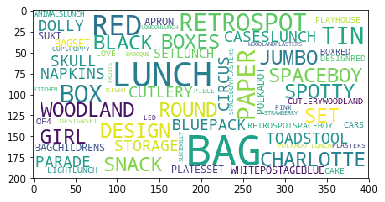

In [41]:
#get products with smallest values for svd_1
closest_to_inside = np.argsort(V2[1,:])[::1]
stock_code_decribe = data2.groupby('StockCode_NR_int')['Description'].apply(np.unique).reset_index(drop=False)
closest_pdts = closest_to_inside[:30]
print ('products... largest sales')
#print stock_code_decribe[stock_code_decribe.StockCode_NR_int.isin(closest_pdts)]
text = ''
for i in stock_code_decribe[stock_code_decribe.StockCode_NR_int.isin(closest_pdts)]['Description'].values:
    text = text + i[0]
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
print (list(map(lambda x : str(x[0]),
          stock_code_decribe[stock_code_decribe.StockCode_NR_int.isin(closest_pdts)]['Description'].values[:20])))

plt.imshow(wordcloud)
plt.show()

# Predicting Churn

In [42]:
# looking at the top20% for the first half and see which ones did not make it in second half
#later
customer_info_orders['Rev_first_half'] = np.mean(customer_info_orders[[x for x in customer_info_orders.keys() if 'Revenue_' in str(x)][:6]],1)
customer_info_orders['Rev_second_half'] = np.mean(customer_info_orders[[x for x in customer_info_orders.keys() if 'Revenue_' in str(x)][6:]],1)
customer_info_orders['Churn'] = (1*(customer_info_orders['Rev_second_half'] ==0 ))
#customer_info_orders['Rev_future'] = np.log10(1+np.abs(customer_info_orders['Rev_future']))*np.sign(customer_info_orders['Rev_future'])


colsA =  ['Revenue_2011_' + str(x) for x in [1,2,3,4,5]]+['Revenue_2010_12']
customer_info_orders['mean_log_rev_firsthalf']= np.log10(1+np.mean(customer_info_orders[colsA].values,1))

for i in ['Revenue_2011_' + str(x) for x in [1,2,3,4,5]]+['Revenue_2010_12']:
    customer_info_orders['log_r'+i[1:]] = np.log10(1+customer_info_orders[i])

predictors = ['log_r'+i[1:] for i in list(customer_info_orders.keys()[3:9])]+ ['Num_invoices_during_train','Discount_given','mean_log_rev_firsthalf','constant']+\
                 list([x for x in customer_info_orders.keys() if 'svd' in str(x)]) [:3] 

target= 'Churn'

import statsmodels.formula.api as smf

#print predictors
customer_info_orders['constant']=1
customer_info_orders2 = customer_info_orders[customer_info_orders['Rev_first_half']!=0].reset_index(drop=True)
#customer_info_orders2 = customer_info_orders2.sort_values(target).reset_index(drop=True)
z = customer_info_orders2[['pdt_'+str(x) for x in range(100)]].describe().loc['mean']
#predictors += list(z[z>0.03].index)
for i in predictors:
    customer_info_orders2[i]=customer_info_orders2[i].fillna(np.mean(customer_info_orders2[i].dropna()))
dtrain = customer_info_orders2
train_id = [x for x in range(len(dtrain)) if x%5!=0]
test_id = [x for x in range(len(dtrain)) if x%5==0]
dtrain1 = customer_info_orders2.iloc[train_id].reset_index(drop=True)
dtrain2 = customer_info_orders2.iloc[test_id].reset_index(drop=True)
#print customer_info_orders2[[target,'Rev_first_half','Rev_second_half']]

In [43]:
import sklearn
from sklearn.metrics import roc_auc_score

import statsmodels.api as sm
for alpha in [0.02,][:]:
    if alpha!=0.0511:
        dtrain_scaled = (dtrain[predictors]-np.mean(dtrain[predictors].values,0))/np.std(dtrain[predictors].values,0)
        dtrain1_scaled = (dtrain1[predictors]-np.mean(dtrain1[predictors].values,0))/np.std(dtrain1[predictors].values,0)
        dtrain2_scaled = (dtrain2[predictors]-np.mean(dtrain1[predictors].values,0))/np.std(dtrain1[predictors].values,0)
        dtrain_scaled['constant'] = 1
        dtrain1_scaled['constant'] = 1
        dtrain2_scaled['constant'] = 1
        predictors_noNan = np.array(predictors)[~dtrain1_scaled.describe().loc['mean'].isnull()]
        model = sm.GLM(dtrain1[target],dtrain1_scaled[predictors_noNan],family=sm.families.Binomial()).fit_regularized(alpha= alpha)
        predictors_nonZero = list(predictors_noNan[model.params!=0])
        model_unbias = sm.GLM(dtrain1[target],dtrain1_scaled[predictors_nonZero],family=sm.families.Binomial()).fit()
        model_unbias_full = sm.GLM(dtrain[target],dtrain_scaled[predictors_nonZero],family=sm.families.Binomial()).fit()
        print  (alpha,len(predictors_nonZero))
        print ('train R2',roc_auc_score(dtrain1[target],model_unbias.predict(dtrain1_scaled[predictors_nonZero])))
        print ('test R2',roc_auc_score(dtrain2[target],model_unbias.predict(dtrain2_scaled[predictors_nonZero])))
        print (model_unbias_full.summary())

(0.02, 8)
('train R2', 0.7435926331877056)
('test R2', 0.7264348345954563)
                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 2710
Model:                            GLM   Df Residuals:                     2702
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1403.5
Date:                Tue, 03 Sep 2019   Deviance:                       2807.0
Time:                        17:10:54   Pearson chi2:                 2.60e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

# price optimisation

In [44]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalRevenue,Month,Day,Year,Time,Hour,Min,datetime,Day_week,StockCode_NR
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,12,1,2010,8:26,8,26,2010-12-01,3wed,85123
1,536535,22943,CHRISTMAS LIGHTS 10 VINTAGE BAUBLES,3,12/1/2010 13:38,4.95,15605.0,United Kingdom,14.85,12,1,2010,13:38,13,38,2010-12-01,3wed,22943
2,536534,22112,CHOCOLATE HOT WATER BOTTLE,3,12/1/2010 13:33,4.95,15350.0,United Kingdom,14.85,12,1,2010,13:33,13,33,2010-12-01,3wed,22112
3,536534,22867,HAND WARMER BIRD DESIGN,12,12/1/2010 13:33,2.10,15350.0,United Kingdom,25.20,12,1,2010,13:33,13,33,2010-12-01,3wed,22867
4,536534,22865,HAND WARMER OWL DESIGN,12,12/1/2010 13:33,2.10,15350.0,United Kingdom,25.20,12,1,2010,13:33,13,33,2010-12-01,3wed,22865
5,536534,22834,HAND WARMER BABUSHKA DESIGN,12,12/1/2010 13:33,2.10,15350.0,United Kingdom,25.20,12,1,2010,13:33,13,33,2010-12-01,3wed,22834
6,536534,22866,HAND WARMER SCOTTY DOG DESIGN,12,12/1/2010 13:33,2.10,15350.0,United Kingdom,25.20,12,1,2010,13:33,13,33,2010-12-01,3wed,22866
7,536533,21843,RED RETROSPOT CAKE STAND,1,12/1/2010 13:31,10.95,16955.0,United Kingdom,10.95,12,1,2010,13:31,13,31,2010-12-01,3wed,21843
8,536533,22797,CHEST OF DRAWERS GINGHAM HEART,3,12/1/2010 13:31,16.95,16955.0,United Kingdom,50.85,12,1,2010,13:31,13,31,2010-12-01,3wed,22797
9,536533,22680,FRENCH BLUE METAL DOOR SIGN 5,20,12/1/2010 13:31,1.25,16955.0,United Kingdom,25.00,12,1,2010,13:31,13,31,2010-12-01,3wed,22680


In [76]:
data2['Standardized_price'] = (data2['UnitPrice'] - data2['UnitPrice_mean'])/data2['UnitPrice_std']
customer_info_orders2['Customer_TotalRevenue'] = customer_info_orders2['TotalRevenue']
data3 = pd.merge(data2,customer_info_orders2[['CustomerID','Customer_TotalRevenue']],on='CustomerID')

In [77]:
data3_product = data2.groupby('StockCode_NR_int')['Quantity'].apply(np.array).reset_index(drop=False)
data3_product['Quantity_mean'] = data3_product['Quantity'].apply(np.mean)
data3_product['Quantity_std'] = data3_product['Quantity'].apply(np.std)
del data3_product['Quantity']
data3 = pd.merge(data3,data3_product,on='StockCode_NR_int',how='left')
data3['Standardized_quantity'] = (data3['Quantity'] - data3['Quantity_mean'])/data3['Quantity_std']

In [80]:
data3[['Standardized_quantity','Standardized_price','Customer_TotalRevenue']].corr()


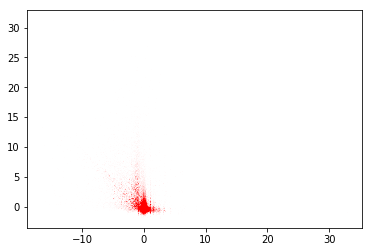

In [90]:
plt.plot(data3[y],data3[x],'ro',markersize=0.003)
plt.show()

In [104]:
# SQUARED LOGLOSS
#predict customer orders
import xgboost as  xgb
'''
train = data2[((data2['Year']==2010)*(data2['Month'].isin([12,]))) | \
              ((data2['Year']==2011)*(data2['Month'].isin([1,2,3,4])))]
test = data2[ ((data2['Year']==2011)*(data2['Month'].isin([5])))]
test2 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,])))]
test3 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([7,])))]
test4 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,7,])))]
test5 = data2[ ((data2['Year']==2011)*(data2['Month'].isin([6,7,8,9,10,11])))]

len(train),len(test),len(test2),len(test3),len(test4),len(test5)
'''
c
predictors = [y,z]
x,y,z='Standardized_quantity','Standardized_price','Customer_TotalRevenue'
target = x
data3 = data3[[x,y,z]].dropna()
if True:
    train_id = [x for x in range(len(data3)) if x%5!=0]
    test_id = [x for x in range(len(data3)) if x%5==0]
    dtrain = data3.iloc[train_id]
    dcv = data3.iloc[test_id]
    gc.collect()
    params = {}
    params["objective"] = "reg:linear"
    params["eta"] = 0.01/1
    params["min_child_weight"] = 1
    params["subsample"] = 0.3
    params["colsample_bytree"] = 0.3
    params["scale_pos_weight"] = 1.0
    params["silent"] = 1
    params["verbose"] = 1
    params["max_depth"] = 5
    params["tree_method"] = 'hist'
    #params["nthread"] = 6
    params["nthread"] = 5
    #params['booster']= "gblinear"
    early_stopping_rounds = 50
    plst = list(params.items())
    xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
    xgcv = xgb.DMatrix(dcv[predictors].values, label=dcv[target].values)
    #    xgb.train(xgtrain[predictors],dtrain['Demanda_uni_equil'],eval_set=evallist ,
    #            eval_metric='rmse', early_stopping_rounds=early_stopping_rounds)
    watchlist  = [ (xgtrain,'train'),(xgcv,'eval')][:]
    a = {}
    model=xgb.train(plst,xgtrain,3000,watchlist,verbose_eval =100,feval=None,
                    early_stopping_rounds=early_stopping_rounds*3,evals_result=a)


[0]	train-rmse:1.15804	eval-rmse:1.11935
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 150 rounds.
[100]	train-rmse:0.910686	eval-rmse:0.866457
[200]	train-rmse:0.849597	eval-rmse:0.805924
[300]	train-rmse:0.833544	eval-rmse:0.791303
[400]	train-rmse:0.828699	eval-rmse:0.787425
[500]	train-rmse:0.826802	eval-rmse:0.786203
[600]	train-rmse:0.825748	eval-rmse:0.785473
[700]	train-rmse:0.825064	eval-rmse:0.785017
[800]	train-rmse:0.824668	eval-rmse:0.784676
[900]	train-rmse:0.824308	eval-rmse:0.784337
[1000]	train-rmse:0.823992	eval-rmse:0.784157
[1100]	train-rmse:0.823716	eval-rmse:0.783923
[1200]	train-rmse:0.823481	eval-rmse:0.783753
[1300]	train-rmse:0.823255	eval-rmse:0.7836
[1400]	train-rmse:0.823096	eval-rmse:0.783417
[1500]	train-rmse:0.822937	eval-rmse:0.783304
[1600]	train-rmse:0.822819	eval-rmse:0.78318
[1700]	train-rmse:0.822654	eval-rmse:0.783013
[1800]	train-rmse:0.82257	eval-rmse:0.782926


In [97]:
dtrain[target]

1         -0.158916
2         -0.132594
3         -0.158916
4         -0.158916
6         -0.158916
7         -0.079949
8         -0.158916
9         -0.158916
11        -0.158916
12        -0.158916
13        -0.158916
14        -0.158916
16        -0.079949
17        -0.270590
18        -0.270590
19        -0.270590
21        -0.270590
22        -0.270590
23         0.008761
24        -0.270590
26        -0.270590
27        -0.270590
28        -0.270590
29        -0.270590
31        -0.270590
32        -0.270590
33        -0.270590
34        -0.304720
36        -0.304720
37        -0.304720
            ...    
293111    -0.111095
293112    -0.217388
293113    -0.232251
293114     0.104252
293116     2.054019
293117     2.054019
293118     1.226206
293119    -0.121976
293121     1.104811
293122     2.660870
293123    -0.139203
293124     2.516652
293126     0.265453
293127     2.274426
293128     0.919819
293129     0.052286
293131    -0.058401
293132     0.103540
293133     2.102922
